<a href="https://colab.research.google.com/github/Dok-E/Learn_XOR/blob/main/train_XOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Premier exemple d'apprentissage supervisé :  créer un réseau de neurons qui apprendra à réaliser l'opération XOR

### **Spécifications**


*   2 entrées
*   1 sortie  (obéit à la table de vérité de fonction XOR)





In [ ]:
# On va créer les données d'entrée et de sortie pour apprentissage
import numpy as np

X = np.array([[0, 0], [0,1], [1,0],  [1,1]],dtype='float32') #entrées sont flottant
Y = np.multiply(X[:,0] != X[:,1],1.0) # façon simple de faire un XOR

print("Valeurs numériques de x et y")
print ("X=",X)
print ("Y=",Y)

Valeurs numériques de x et y
X= [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Y= [0. 1. 1. 0.]


On peut visualiser les données utilisées pour apprentissage sous forme de "nuage de points". Cela permet de mieux voir quelle séparation de data nous attendons du réseau.

(-0.5, 1.5, -0.5, 1.5)

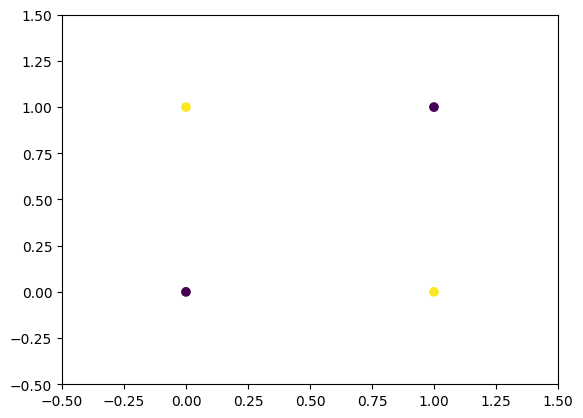

In [ ]:
from matplotlib import pyplot as plt
# scatter - fonction de visualisation des donnée de matplotlib
plt.scatter (X[:,0],X[:,1],c=Y) # Y - les valeurs de Y sont utilisée pour colorier les points
plt.axis([-.5,1.5,-.5,1.5])

✋
On prépare une "augmentation de données" en créant des vecteurs d'entrée plus grands et en intégrant un peu de "bruit"

(200, 2)
(200,)


(-1.0, 2.0, -1.0, 2.0)

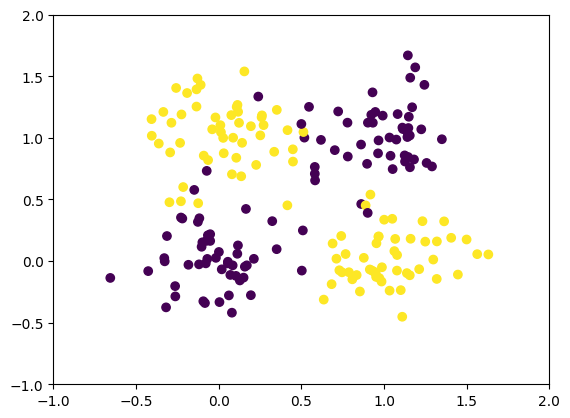

In [ ]:
n = 50 # on va commencer avec un petit nombre, puis faire un test avec plus grand.
Xr = np.tile(X,(n,1)) # copie les éléments de vecteurs n-fois pour augmenter sa taille
Yr = np.multiply(Xr[:,0] != Xr[:,1],1.0) # on produit la sortie correspondante

print(Xr.shape)
print(Yr.shape)

t1 =np.array( 0. + 0.25 * np.random.randn(4*n, 1))
t2 =np.array( 0. + 0.25 * np.random.randn(4*n, 1))
Xr[:,0] = Xr[:,0] + t1[:,0]
Xr[:,1] = Xr[:,1] +  t2[:,0]

plt.scatter (Xr[:,0],Xr[:,1],c=Yr)
plt.axis([-1,2.,-1,2.])


❓
Etes - vous prêt pour apprendre ?

👌 Commençons par préparer vérifier les formats des données

In [ ]:
# on fait import de la librairie KERAS from tensorflow qui nous permettra de coder le réseau et manipuler les données d'apprentissage
# on doit convertir la sortie en format attendu pas l'apprentissage (one-hot)
from tensorflow import keras
d = keras.utils.to_categorical(Y,num_classes=2)
ds = keras.utils.to_categorical(Yr, num_classes=2)
print (Yr[0])
print (d[0])
print (ds[0])

0.0
[1. 0.]
[1. 0.]


In [ ]:
from sklearn.model_selection import train_test_split #sklearn est une librairie très utiles - gardez-la en mémoire

X_train, X_test, y_train, y_test = train_test_split( Xr, ds, test_size=0.20)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(160, 2) (40, 2) (160, 2) (40, 2)


______________________________________________________________
⚠ ✅
C'est ici que l'on crée notre modèle du réseau

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(keras.Input(shape=(2,)))
model.add(keras.layers.Dense(12, activation=keras.activations.relu))
model.add(keras.layers.Dense(12, activation=keras.activations.relu))
model.add(keras.layers.Dense(2, activation=keras.activations.sigmoid))

#model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())
print(model.optimizer.get_config())
print(model.get_weights())




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218 (872.00 B)

 Trainable params: 218 (872.00 B)

 Non-trainable params: 0 (0.00 B)

None
{'name': 'adam', 'learning_rate': 0.0010000000474974513, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'amsgrad': False}
[array([[ 0.54711163,  0.62747514, -0.05431062, -0.4978836 ,  0.5060084 ,
        -0.1876989 , -0.4310382 ,  0.54694664, -0.50567484,  0.62279916,
        -0.28843722, -0.46691203],
       [-0.41163915,  0.1835106 ,  0.01581061, -0.05912888, -0.38446566,
         0.532493  , -0.00520504, -0.5942649 , -0.34450674,  0.40613425,
        -0.11744905, -0.20882735]], dtype=float32), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), array([[ 0.18163288,  0.4293784 ,  0.41632557, -0.35247898,  0.18164325,
        -0.12943411, -0.45166266,  0.2885759 , -0.19125986,  0.21326613,
        -0.31577826,  0.04312932],
       [ 0.36419

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7103 - loss: 0.6543
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7398 - loss: 0.6468  
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7557 - loss: 0.6395 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7425 - loss: 0.6455 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7762 - loss: 0.6382  
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8579 - loss: 0.6184 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8535 - loss: 0.6164  
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8299 - loss: 0.6129  
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8391 - loss: 0.6097  
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8655 - loss: 0.6057  
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8553 - loss: 0.5949 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8678 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12)                  │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 656 (2.57 KB)

 Trainable params: 218 (872.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 438 (1.71 KB)

None


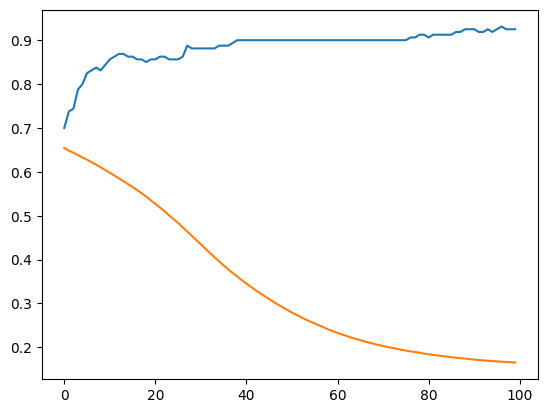

In [ ]:

history = model.fit(X_train, y_train, epochs=100, verbose=1)
#history = model.fit(X_train, y_train, epochs=500, verbose=1)
print(history.history.keys())
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
#plt.plot(history.history['val_accuracy'])
print(model.summary())


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[75  5]
 [ 7 73]]


Text(0.5, 0, 'predicted label')

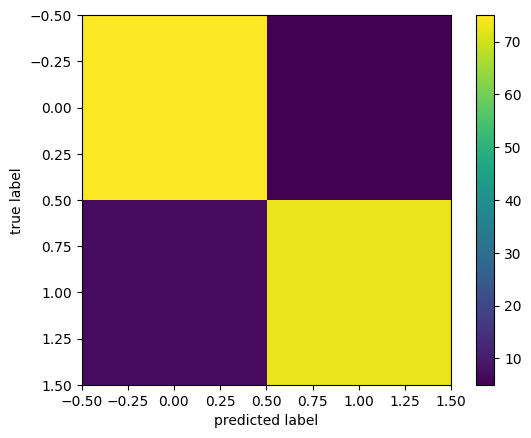

In [ ]:
from sklearn.metrics import confusion_matrix

yhat = model.predict(X_train)
yhat=np.argmax(yhat, axis=1)
y_train=np.argmax(y_train, axis=1)
CM = confusion_matrix(y_train, yhat)
print(CM)
plt.figure('confusion matrix')
ax = plt.imshow(CM); plt.colorbar()
plt.ylabel('true label')
plt.xlabel('predicted label')

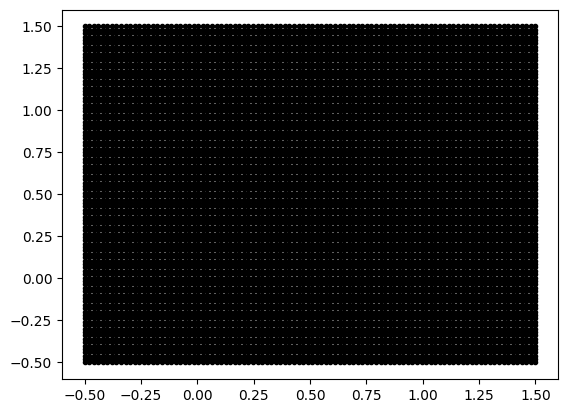

In [ ]:
n = 100
nx, ny = (n, n)

x = np.linspace(-0.5, 1.5, nx)
y = np.linspace(-0.5, 1.5, ny)
xv, yv = np.meshgrid(x, y)

plt.plot(xv, yv, marker='.', color='k', linestyle='none')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


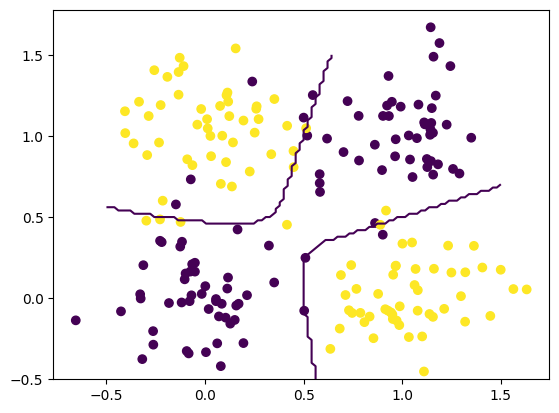

In [ ]:
xvf = np.reshape(xv,(n*n,1))
yvf = np.reshape(yv,(n*n,1))

xx = np.concatenate((xvf,yvf),axis=1)
results= model.predict(xx)
yhat=np.argmax(results, axis=1)
yhat = np.reshape(yhat,(n,n))
plt.scatter (Xr[:,0],Xr[:,1],c=Yr)
yhat.shape
cs = plt.contour(xv,yv,yhat,[0.5])
